# WORK IN PROGRESS


Ok, so let's get an order here.

I think the general flow should be:

1. Title statement

   Title
   Authorship
   Problem statement: What am I trying to do?

2. Problem discussion
   Issues with this particular problem: Noisy data, Removal of artifacts, Feature Selection
   
3. Data Cleaning Implementation
   Remove 60 Hz interference with filter_elec_noise (this data is from the U.S. - Albany, to be specific)
   Explain why running WPT is advisable
   Run WPT with wpt_gather_all_nodes
   Find node with max std with...node_with_max_std
   Remove those nodes that need to be removed (discuss cutoff threshold for this)
   Reassemble
   Run ICA
   Zero the channels with the largest kurtosis (That's it! Artifacts removed!)
  
4. Feature selection
   Sampling frequency differences mean I am using 400 previous samples of input for every output
   Discusse features: mav, peak, std, alpha, beta, theta, delta, gamma
   
5. Show results
   

# Decoding Finger Movements From Brain Waves

Author: Irving Campbell

## Problem statement

#### Can we determine which finger on a person's hand is moving based on only on that patient's electrocortigraphical (ECoG) data?

## Experimental background

The ECoG data used in this project was part of the 4th Brain-Computer Interface Data Competition, originally held in 2000.  More detail on the data gathering procedure can be found here: http://www.bbci.de/competition/iv/desc_4.pdf.  A copy of this paper is also included in this repository.  For the purposes of this project, only the data from subject \#2 was used.

From the paper:

*\"Signals from the electrode grid were amplified and digitized using Synamps2 amplifiers (Neuroscan, El Paso, TX). The general-purpose BCI system BCI2000 provided visual stimuli to the patient, acquired brain signals from the Synamps2 system, and also recorded the flexion of individual fingers (on the hand contralateral to the implanted grid) using a data glove (Fifth Dimension Technologies, Irvine, CA). BCI2000 stored the brain signals, the timing of stimulus presentation, and the flexion of each of the fingers in a data file. Data files were converted to Matlab format for this competition. Each patient had subdural electrode arrays (Ad-Tech, Racine, WI) implanted. Each array contained 48-64 platinum electrodes that were configured in 8x6 or 8x8 arrangements. The electrodes had a diameter of 4 mm (2.3mm exposed), 1 cm inter-electrode distance, and were embedded in silastic. Electrocorticographic (ECoG) signals (i.e., 62, 48, and 64 channels from subjects 1, 2, and 3, respectively) were acquired with respect to a scalp reference and ground (Fig. 1), band pass filtered between 0.15 to 200 Hz, and sampled at 1000 Hz.  The subjects were cued to move a particular finger by displaying the corresponding word (e.g., ”thumb”) on a computer monitor placed at the bedside (Fig. 2). Each cue lasted two seconds and was followed by a two-second rest period during which the screen was blank. During each cue, the subjects typically moved the requested finger 3-5 times. This number varied across subjects and fingers. There were 30 movement stimulus cues for each finger (i.e., a total of 150 cue presentations and about 90-150 flexions of each finger); stimulus cues were inter-leaved randomly. This experiment lasted 10 minutes for each subject.\"*



## Discussion

Using ECoG data as a predictor of finger flexion is difficult for multiple reasons:

##### Noisy data

This data is not only inherently chock full of noise, but this noise is from multiple sources.  We can generally classify the noise as being external, biological or cognitive in nature.

###### - External

Much of the external noise is either already present in the room at the time of the experiment or a result of the experimental process itself.  The biggest things to worry about are (1) 60 Hz interference from the other electronics in the room and (2) movement of cables showing up as large spikes in the ECoG data.

###### - Biological

ECoG waveforms are just electrical impulses and waveforms.  Other physical processes are governed or controlled by bioelectric brain activity, so they will show up in the data as well.  This includes things like speaking, jaw clenching, coughing, sneezing, moving of the eyes and even regulation of the heartbeat.

###### - Cognitive/Mental

Since this is a direct measurement of brain activity, any thought processes will naturally result in some electrical activity and will end up as a part of the ECoG data.  For instance, trying to remember something, performing mental arithmetic, becoming frustrated or tired during the experiment - these would all be represented within the data.

##### Removal of artifacts

Very few of these noise artifacts are easy to spot.  In turn, that makes many of them hard to remove.  Things like 60 Hz interference are easy to clear, but many of the other noise sources are impossible to directly identify.  Often, the best way to attempt to remove them is often by visual identification or by a mathematical transformation of the data.  ECoG data is very small in amplitude, so it is safe to assume that much larger movements within the waveform are attributable to outside noise.

##### Time-series data

The data is sequential and therefore not independent.  Each data point is sampled in order, so each one is directly related to the one sampled just before.  This adds an extra layer of complication to the process.

## Data Cleaning

Cleaning the data takes place in three steps: basic filtering, wavelet packet transformation, and independent component analysis.

##### Basic Filtering

The frequency of room interference from AC power sources is 60 Hz in the United States, so that frequency was removed using a software notch filter.

##### Wavelet Packet Transform (WPT)

Wavelet Packet Transforms are a way to transform data to contain both time and frequency information at the same time.  Each dataset can be split into individual multiple time/frequency chunks, or "nodes".


Here, I calculated the standard deviation for each of the individual nodes.  Standard deviations act as indicators of "movement" in the data.  Larger standard deviations correlate to larger swings from time point to time point.  In this case, larger swings would be associated with large noise sources, e.g. movement of the cables attached to the individual electrodes.  

In this step, after splitting each of the channels into corresponding nodes, I removed the node with the largest standard deviation and before performing the WPT in reverse to recombine the nodes.

In [1]:
# Show the nodes and the removal and the resulting waveform?

##### Independent Component Analysis (ICA)

ICA is a method designed to split a waveform into additive components, where each of the components is considered to be statistically independent of one another.  Any component containing noise or an artifact can then be removed.

Ideally, the determination of which components contain noise would be as simple as a visual inspection.  However, since it is not clear which components are responsible for the finger movement, finding the noise is not typically this straightforward.

In this case, I calculated the kurtosis across each channel and removed the two channels that had an abnormally large kurtosis.  It was clear from even a visual inspection that these channels were responsible for much of the larger noise artifacts and, after removal, there was no trace of them. 

In [2]:
# Show the differences here. 
# Before and after, and show the ica results for those channels

In [ ]:
## Feature Selection



In [1]:
import import_ipynb
from data_prep import *
X2, y2 = download_and_shape_data()

importing Jupyter notebook from data_prep.ipynb


In [2]:
X2_filtered, adjusted_array = filter_elec_noise(60.0, 60.0, 1000, X2['train_data'])

In [3]:
import matplotlib.pyplot as plt

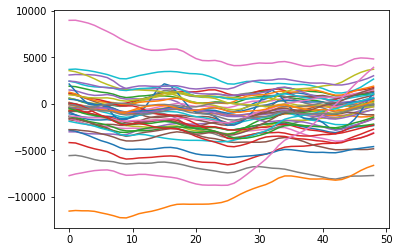

In [4]:
plt.plot(X2['train_data'][0:49]);

In [5]:
import numpy as np
X2bychannel = np.stack(X2['train_data'], axis = 1)

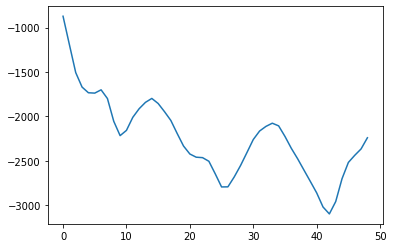

In [6]:
plt.plot(X2bychannel[0][0:49])

In [7]:
X2filteredbychannel = np.stack(X2_filtered, axis = 1)

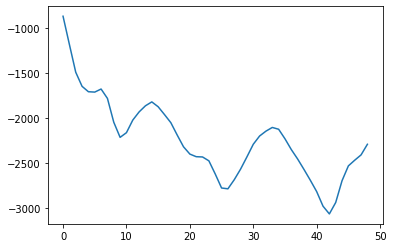

In [8]:
plt.plot(X2filteredbychannel[0][0:49])

In [9]:
xdiff = X2filteredbychannel[0:48][0:49]-X2bychannel[0:48][0:49]

In [10]:
np.shape(X2filteredbychannel[0:48][0:49]), np.shape(X2bychannel[0:48][0:49])

((48, 400000), (48, 400000))

In [14]:
xshortened = xdiff[0:48]

In [20]:
np.shape(xshortened[:][0])

(400000,)

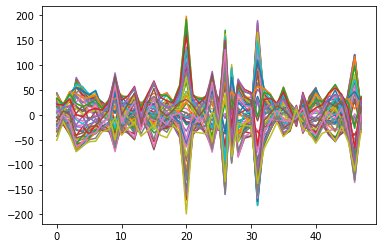

In [31]:
plt.plot(xdiff[:,0:49]);

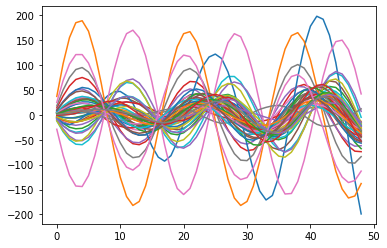

In [30]:
for f in range(48):
    plt.plot(xdiff[f,0:49])

586.3581840899626
156.28571428571428
537.3960849645981
2362.907955018742
1621.1861724281548
927.5918367346939
802.5714285714286
245.78842149104543
293.6326530612245
2548.4006663890045
517.0478967097043
369.52019991670136
922.0041649312786
276.27905039566843
412.96126613910866
1116.5714285714287
360.1424406497293
454.04081632653066
211.21782590587256
733.0837151187005
9136.119117034568
507.1653477717618
394.52394835485217
454.73969179508526
2471.4135776759686
310.99375260308204
12711.442732194919
4572.224073302791
2227.5510204081634
831.7009579341941
493.7542690545606
16006.109954185755
1165.2761349437733
418.19491878384
86.35485214493963
827.158683881716
291.26447313619326
126.81632653061224
504.4073302790505
533.0129112869639
1291.8067471886714
254.87380258225735
497.42690545605996
874.734693877551
670.923781757601
889.2994585589339
7264.867971678466
340.29987505206157


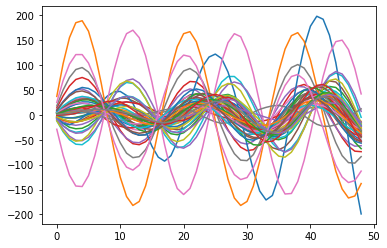

In [35]:
X2bychannel = np.stack(X2['train_data'], axis = 1)
X2filteredbychannel = np.stack(X2_filtered, axis = 1)
xdiff = X2filteredbychannel[0:48][0:49]-X2bychannel[0:48][0:49]
maxinterference = -1
for f in range(48):
    plt.plot(xdiff[f,0:49])
    print(np.var(xdiff[f,0:49]))

New max! Channel 0
New max! Channel 3
New max! Channel 9
New max! Channel 20
New max! Channel 26
New max! Channel 31
Channel with biggest variance: 47 at 16006.109954185755


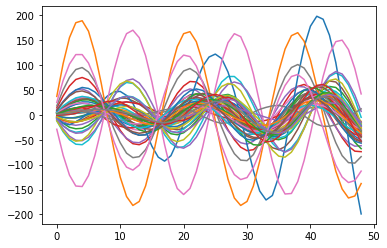

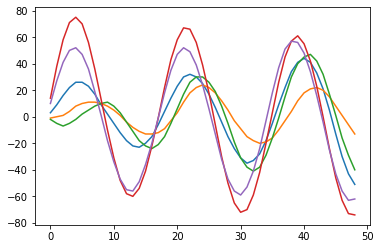

In [52]:
maxinterference = -1
maxinterferenceloc = -1
plt.figure(1)
for f in range(48):
    plt.plot(xdiff[f,0:49])
    if np.var(xdiff[f,0:49]) > maxinterference:
        print("New max! Channel", f)
        maxinterference = np.var(xdiff[f,0:49])
        maxinterferenceloc = f
print("Channel with biggest variance:", f, "at", maxinterference)

plt.figure(2)
for f in range(5):
    plt.plot(xdiff[f,0:49])
